In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Load CSV files
df1 = pd.read_csv(r"C:\Users\acer\OneDrive\Documents\Unified Projects\Banking_project\test.csv")
df2 = pd.read_csv(r"C:\Users\acer\OneDrive\Documents\Unified Projects\Banking_project\train.csv")

# Concatenate dataframes
df = pd.concat([df1, df2])

# Save joined data to new CSV file
df.to_csv("joined_file.csv", index=False)



In [32]:
# df1.head()

In [33]:
df1.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [60]:
# Load the dataset
data = pd.read_csv(r"C:\Users\acer\OneDrive\Documents\Unified Projects\Banking_project\test.csv")
# Display basic info and check for missing values
print(data.info())
print(data.isnull().sum())
print(data.head())
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)
# Separate features and target variable
x = data.drop('Y _yes', axis=1)
# y = data['Y _yes']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        4521 non-null   int64 
 1   Job        4521 non-null   object
 2   Marital    4521 non-null   object
 3   Education  4521 non-null   object
 4   Default    4521 non-null   object
 5   Balance    4521 non-null   int64 
 6   Housing    4521 non-null   object
 7   Loan       4521 non-null   object
 8   Contact    4521 non-null   object
 9   Day        4521 non-null   int64 
 10  Month      4521 non-null   object
 11  Duration   4521 non-null   int64 
 12  Campaign   4521 non-null   int64 
 13  Pdays      4521 non-null   int64 
 14  Previous   4521 non-null   int64 
 15  Poutcome   4521 non-null   object
 16  Y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Hous

In [61]:
print(data.describe())

               Age       Balance          Day     Duration     Campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             Pdays     Previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


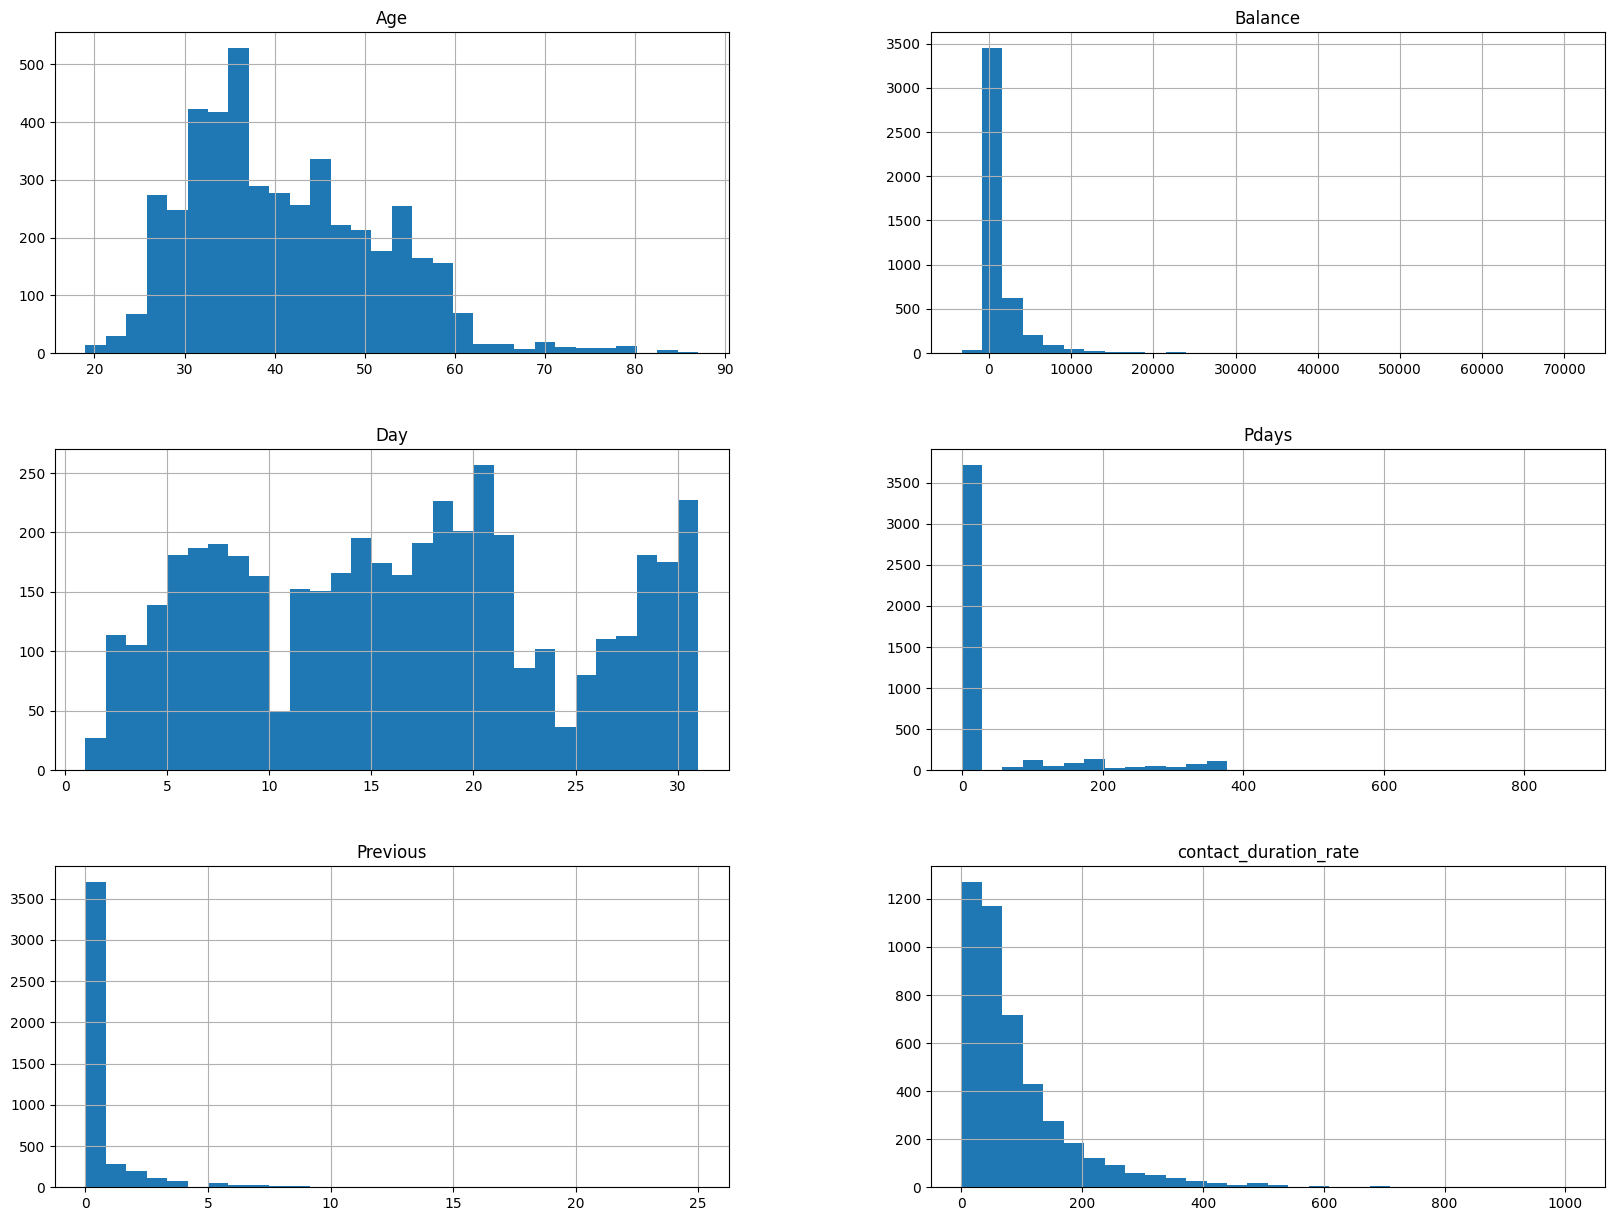

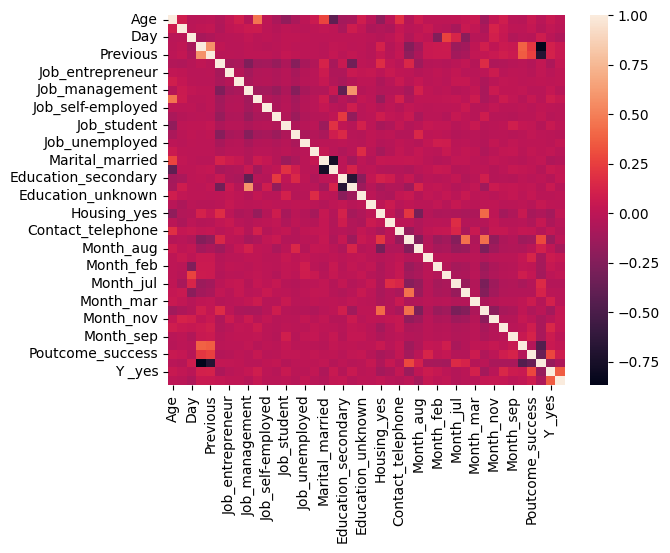

In [70]:
# Histograms for numeric features
data.hist(bins=30, figsize=(20, 15))
plt.show()
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

In [62]:
# Feature engineering example: combining related features
data['contact_duration_rate'] = data['Duration'] / (data['Campaign'] + 1)
# Drop original features if necessary
data = data.drop(['Duration', 'Campaign'], axis=1)
# Redefine features and target variable after feature engineering
X = data.drop('Y _yes', axis=1)
y = data['Y _yes']

In [38]:
print(data.columns)

Index(['Age', 'Balance', 'Day', 'Pdays', 'Previous', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Job_unknown', 'Marital_married', 'Marital_single',
       'Education_secondary', 'Education_tertiary', 'Education_unknown',
       'Default_yes', 'Housing_yes', 'Loan_yes', 'Contact_telephone',
       'Contact_unknown', 'Month_aug', 'Month_dec', 'Month_feb', 'Month_jan',
       'Month_jul', 'Month_jun', 'Month_mar', 'Month_may', 'Month_nov',
       'Month_oct', 'Month_sep', 'Poutcome_other', 'Poutcome_success',
       'Poutcome_unknown', 'Y _yes', 'contact_duration_rate'],
      dtype='object')


In [47]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
# Make predictions
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
# Evaluate models
print("Logistic Regression Metrics")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred)}")
print(f"Precision: {precision_score(y_test, log_reg_pred)}")
print(f"Recall: {recall_score(y_test, log_reg_pred)}")
print(f"F1 Score: {f1_score(y_test, log_reg_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, log_reg_pred)}")
print("\nRandom Forest Classifier Metrics")
print(f"Accuracy: {accuracy_score(y_test, rf_clf_pred)}")
print(f"Precision: {precision_score(y_test, rf_clf_pred)}")
print(f"Recall: {recall_score(y_test, rf_clf_pred)}")
print(f"F1 Score: {f1_score(y_test, rf_clf_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_clf_pred)}")

Logistic Regression Metrics
Accuracy: 0.8961325966850828
Precision: 0.5555555555555556
Recall: 0.20408163265306123
F1 Score: 0.29850746268656714
ROC AUC: 0.5921275573426397

Random Forest Classifier Metrics
Accuracy: 0.901657458563536
Precision: 0.6451612903225806
Recall: 0.20408163265306123
F1 Score: 0.31007751937984496
ROC AUC: 0.5952254507751056


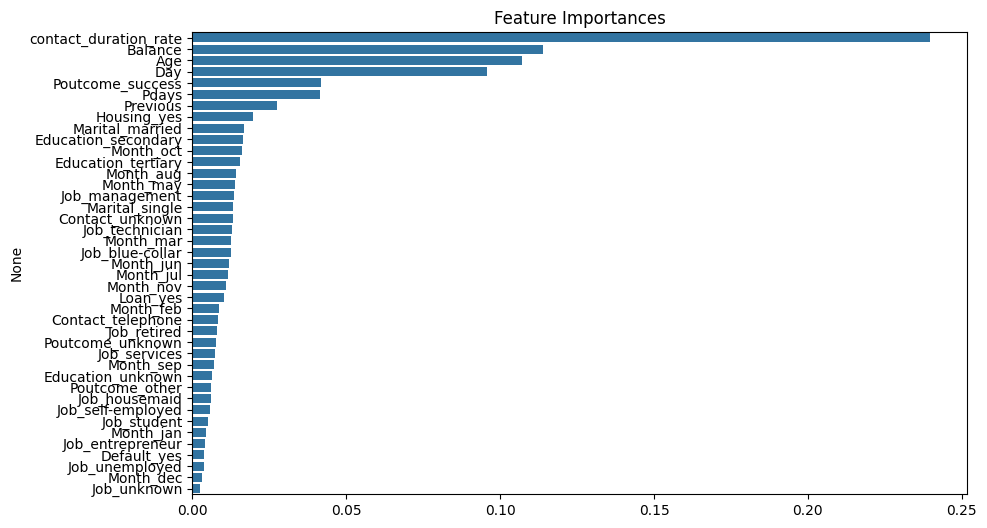

In [48]:
# Feature importance for Random Forest
importances = rf_clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()

In [77]:
from flask import Flask, request, jsonify
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
 data = request.get_json(force=True)
 input_data = np.array([data[feature] for feature in X.columns])
 input_data = scaler.transform([input_data])
 prediction = rf_clf.predict(input_data)
 return jsonify({'prediction': int(prediction[0])})
if __name__ == '__main__':
 app.run(debug=True)
 

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [67]:
# from flask import Flask, request, jsonify
# import numpy as np

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json(force=True)
#     input_data = np.array([data[feature] for feature in X.columns])
#     input_data = scaler.transform([input_data])
#     prediction = rf_clf.predict(input_data)
#     return jsonify({'prediction': int(prediction[0])})

# if __name__ == '__main__':
#     app.run(debug=True)



In [66]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier

# # Load your data
# data = pd.read_csv(r"C:\Users\acer\OneDrive\Documents\Unified Projects\Banking_project\test.csv")

# # Define features (X) and target
# X = data.drop('target', axis=1)
# y = data['target']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Scale data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Train random forest classifier
# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train_scaled,y_train)


In [75]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

# # Assuming X, scaler, and rf_clf are defined elsewhere
# X = # your feature columns
# scaler = # your scaler object
# rf_clf = # your random forest classifier object

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    input_data = np.array([data[feature] for feature in X.columns])
    input_data = scaler.transform(np.squeeze(input_data))  # or .reshape(1, -1)
    prediction = rf_clf.predict(input_data)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1